## Importing requirements

In [52]:
import pandas as pd                     # pandas - dataframe library
import matplotlib.pyplot as plt         # matplotlib.pyplot - plot data
import numpy as np                      # numpy - provide N-dim object support
import sklearn
import matplotlib.image as mpimg
%matplotlib inline
import scipy.misc
import cv2
import glob
import imageio


## Defining the filename, read and plot the image
### Image stored as an array and you can perform operations on it

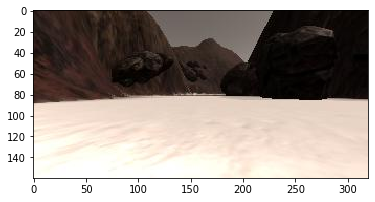

In [30]:

filename = 'image.jpg'

image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

### Explore image size and datatype, the minimum and maximum values in the array

In [31]:
print(image.dtype, image.shape, np.min(image), np.max(image))

uint8 (160, 320, 3) 0 255


#### Characteristics
* An 8-bit unsigned integer array (uint8)
* Size of the array is (160, 320, 3) meaning:
    * Image size is 160 pixels in the y-direction (height) 
    * 320 pixels in the x-direction (width)  
    * Has 3 layers or "color channels" = RGB
* Minimum values = 0
* Maximum values = 255
 
 *This comes from the fact that with 8 bits of information for each pixel in each color channel, you have 
282^8
2
8
or 256 possible values, with the minimum possible value being 0 and the maximum being 255. 

##### Note - Not all images are scaled this way so it's always a good idea to check the range and data type of the array after reading in an image if you're not sure.

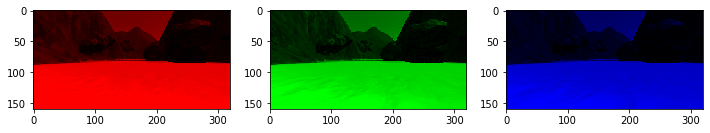

In [32]:
# Note: we use the np.copy() function rather than just saying red_channel = image
# because in Python, such a statement would set those two arrays equal to each other
# forever, meaning any changes made to one would also be made to the other!
red_channel = np.copy(image)
# Note: here instead of extracting individual channels from the image
# I'll keep all 3 color channels in each case but set the ones I'm not interested 
# in to zero.  
red_channel[:,:,[1, 2]] = 0 # Zero out the green and blue channels
green_channel = np.copy(image)
green_channel[:,:,[0, 2]] = 0 # Zero out the red and blue channels
blue_channel = np.copy(image)
blue_channel[:,:,[0, 1]] = 0 # Zero out the red and green channels
fig = plt.figure(figsize=(12,3)) # Create a figure for plotting
plt.subplot(131) # Initialize subplot number 1 in a figure that is 3 columns 1 row
plt.imshow(red_channel) # Plot the red channel
plt.subplot(132) # Initialize subplot number 2 in a figure that is 3 columns 1 row
plt.imshow(green_channel)  # Plot the green channel
plt.subplot(133) # Initialize subplot number 3 in a figure that is 3 columns 1 row
plt.imshow(blue_channel)  # Plot the blue channel
plt.show()

## Color Thresholding

* The mountains are relatively dark (low intensity values) in all three color channels
* Both the ground and the sky are brighter (higher intensity)
* However, the ground is a bit brighter than the sky, such that it should be possible to identify pixels associated with the ground using a simple color threshold.


#### TODO 
    # Create an empty array the same size in x and y as the image but just a single channel
    # Apply the thresholds for RGB and assign 1's where threshold was exceeded
    # Return binary_image

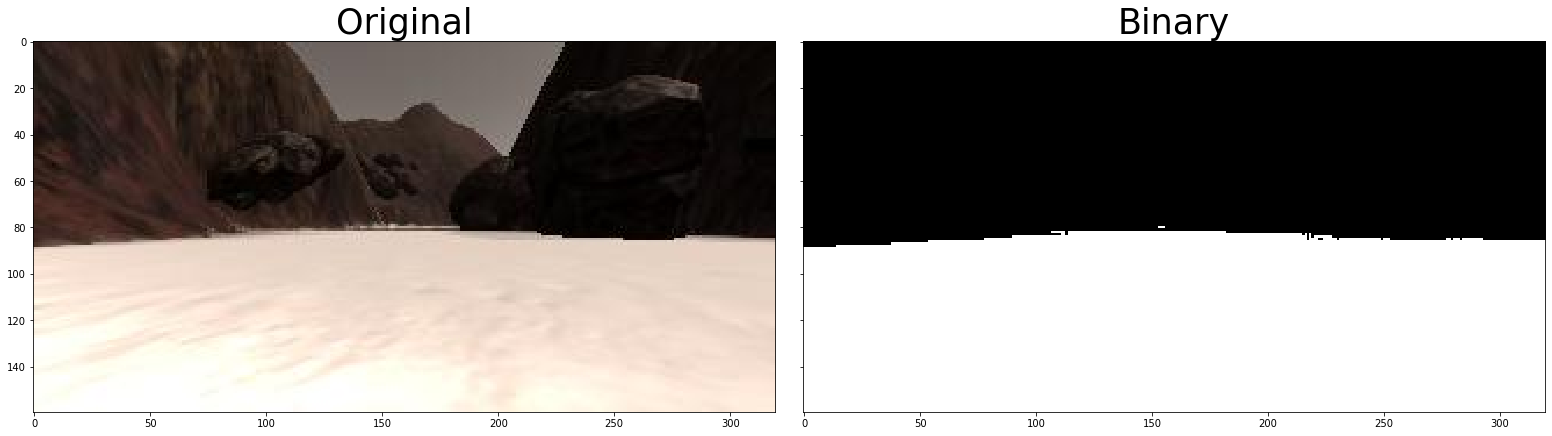

In [33]:
# Read in the image
# There are six more images available for reading
# called sample1-6.jpg, feel free to experiment with the others!
image_name = 'image.jpg'
image = mpimg.imread(image_name)

# funtction for color thresholding
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    color_select = np.zeros_like(img[:,:,0]) # creates an array of zero = to img[:,;,0]
    # find rgb > 0
    above_thresh = ((img[:,:,0] > rgb_thresh[0]) & (img[:,:,1] > rgb_thresh[1]) & (img[:,:,2] > rgb_thresh[2])) 
    color_select[above_thresh] = 1 # converts the rgb>0 to 1
    return color_select

# creating equal values for each rgb
red_thresh = 160
blue_thresh = 160
green_thresh = 160

# Create a new rgb
rgb_threshold = (red_thresh, green_thresh, blue_thresh)
img_binary = color_thresh(image, rgb_thresh=rgb_threshold) # Converting original image to binary

# Create a var for displaying both images side by side
disp, (im1,im2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
disp.tight_layout()

# Original image
im1.imshow(image)
im1.set_title('Original', fontsize=35) 

# Binary image
im2.imshow(img_binary, cmap='gray') # imprinting binary image if a gray color mapping
im2.set_title('Binary', fontsize=35)

# PLoting
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### Percpective Transform
* Getting a top view using a grids 

In [34]:
%matplotlib notebook
import cv2 # OpenCV for percpective transform

#### Choosing destination points
* choose a square set of points so that square meters in the grid are represented by square areas in the destination image. 
* Mapping a one-square-meter grid cell in the image to a square that is 10x10 pixels, for example, implies a mapping of each pixel in the destination image to a 0.1x0.1 meter square on the ground. 

* Choose four points in the source (original) grid image, and where they should map to in the destination (output) image. 

<IPython.core.display.Javascript object>


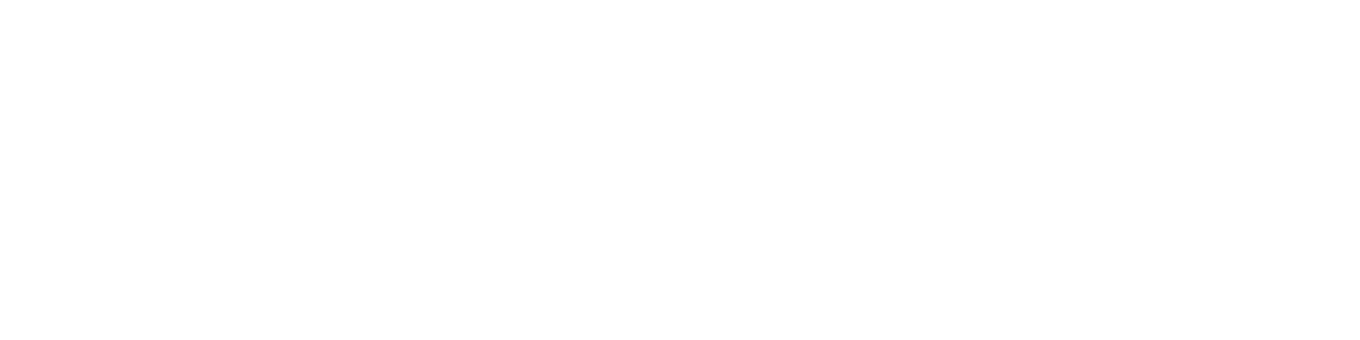

<IPython.core.display.Javascript object>


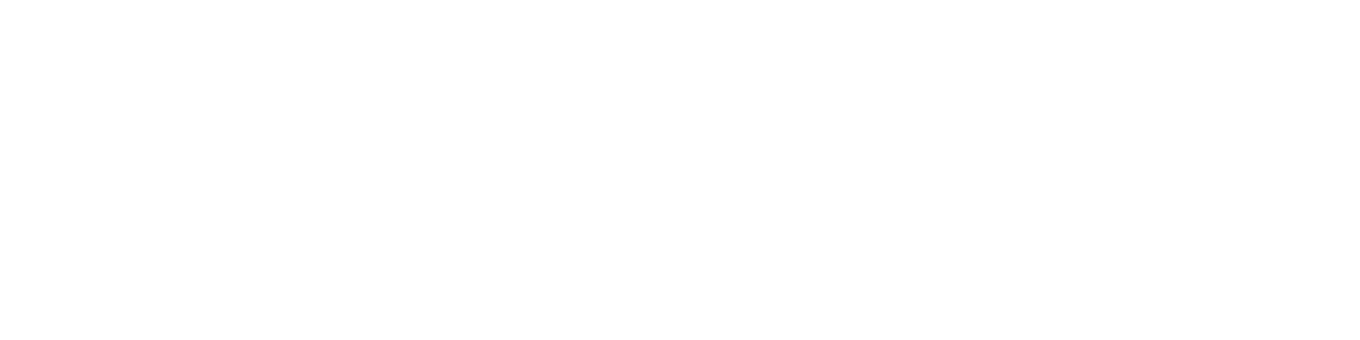

In [35]:
grid = mpimg.imread('grid1.jpg')

    # Get transform matrix using cv2.getPerspectivTransform()
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    # Return the result

def perspect_transform(img, src, dst):
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    return warped

# TODO:
# Define a box in source (original) and 
# destination (desired) coordinates
# Right now source and destination are just 
# set to equal the four corners
# of the image so no transform is taking place
# Try experimenting with different values!
source = np.float32([[14, 140], [302, 140], [200, 96], [118, 96]])
destination = np.float32([[160, 120], [180, 120], [180, 100], [160, 100]])

warped = perspect_transform(grid, source, destination)
# Draw Source and destination points on images (in blue) before plotting
cv2.polylines(grid, np.int32([source]), True, (0, 0, 255), 3)
cv2.polylines(warped, np.int32([destination]), True, (0, 0, 255), 3)
# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
f.tight_layout()
ax1.imshow(grid)
ax1.set_title('Original Image', fontsize=20)

ax2.imshow(warped, cmap='gray')
ax2.set_title('Result', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

#### Optional 

### Warp, Threshold, & Map

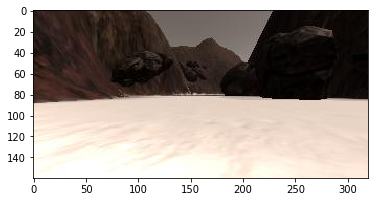

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import cv2

# Read in the same sample image as before
sample = 'mapping.jpg'
maps = mpimg.imread(sample)
plt.imshow(maps)
plt.show()

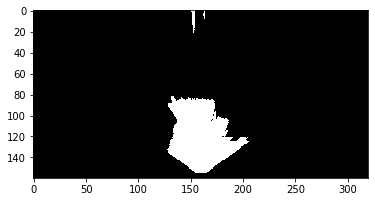

In [37]:
# Assume you have already defined perspect_transform() and color_thresh()

# Define calibration box in source (actual) and destination (desired) coordinates
# These source and destination points are defined to warp the image
# to a grid where each 10x10 pixel square represents 1 square meter
dst_size = 5
    
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it 
bottom_offset = 6

source = np.float32([[14, 140], [301 ,140],[200, 96], [118, 96]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])

warping = perspect_transform(maps, source, destination)
up_colorsel = color_thresh(warping, rgb_thresh=(160, 160, 160))

# Plot the result
plt.imshow(up_colorsel, cmap='gray')
plt.show() 

### Converting to Robot-Centric Coordinates

##### Extract the pixel positions of all navigable terrain (white) pixels and then transform those values to "robot-centric" coordinates, meaning a coordinate frame where the rover camera is at (x, y) = (0, 0)

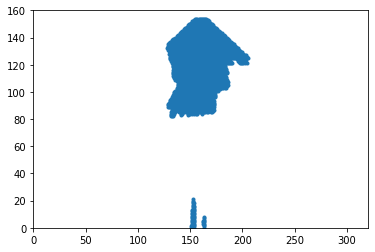

In [38]:
ypos, xpos = up_colorsel.nonzero()
plt.plot(xpos, ypos, '.')
plt.xlim(0, 320)
plt.ylim(0, 160)
plt.show() 

###### -This is actually the same plot / image as before, we're just looking at it with the origin (0, 0) in the lower left, rather than the upper left, and the y-axis reversed.

###### -However, you would also like to swap the x and y axes such that they're consistent with the world coordinate system that you'll eventually be mapping to.

* Use function to take in a binary image, extract the x and y positions in image coordinates and then return x and y in rover coordinates.

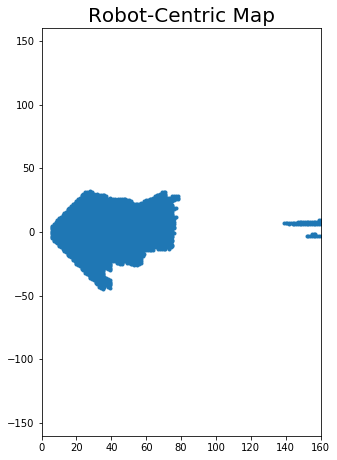

In [39]:
def robot_coords(binary_img):
    # TODO: fill in this function to 
    # Calculate pixel positions with reference to the rover 
    # position being at the center bottom of the image.  
    x_pixel = -(ypos - binary_img.shape[0]).astype(np.float)
    y_pixel = -(xpos - binary_img.shape[1]/2 ).astype(np.float)
    return x_pixel, y_pixel

xpix, ypix = robot_coords(up_colorsel)

# Plot the map in rover-centric coords
fig = plt.figure(figsize=(5, 7.5))
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
plt.title('Robot-Centric Map', fontsize=20)
plt.show() 

#### Rotation and Translation

##### Now that you have generated a map of navigable terrain in rover-centric coordinates, the next step is to map those points to world coordinates.
* To do this, you'll use a rotation followed by a translation.To do this, you'll use a rotation followed by a translation.

#### Rotation
* The rotation is required to account for when the camera takes a picture, the robot can be pointing in any arbitrary direction, given by it's yaw angle.

#### Translation
* The translation is to account for the fact that the robot may be located at any position in the world when it takes a picture.

#### 2 Step process:
    * Rotate the robot-centric coordinates so that the x and y axes are parallel to the axes in world space.
    * Translate the rotated positions by the x and y position values given by the robot's location (position vector) in the world. 

#### Rotation

* You'll accomplish this by applying a rotation matrix to your robot space pixel values (let's call them xpix and ypix). 
* For a rotation through an angle θ\theta, the operation looks like this:
 [x', y'] = [cosθ, sinθ - sinθ, cosθ] * [x, y]
 
 * x' = xcosθ - ysinθ
 * y' = xsinθ + ycosθ
 
##### - In code, you could write it up like this (passing in xpix and ypix as our original pixel positions and yaw as our yaw angle:

In [40]:
# Define a function to apply a rotation to pixel positions
# TODO:
# Convert yaw to radians
# Apply a rotation
# Return the result  

def rotate_pix(xpix, ypix, yaw):
    # yaw angle is recorded in degrees so first convert to radians
    yaw_rad = yaw * np.pi / 180 # Converting degrees to radians

    # yaw_rad = θ / theta
    x_rotated = xpix * np.cos(yaw_rad) - ypix * np.sin(yaw_rad)
    y_rotated = xpix * np.sin(yaw_rad) + ypix * np.cos(yaw_rad)
    return xpix_rotated, ypix_rotated

#### Translation 
* Perform a translation by simply adding the x and y components of the rover's position to the x_rotated and y_rotated values calculated above. 

##### Keep in mind, however, the scale associated with pixels in robot space versus world space.
* If, for example you have mapped pixels in rover space such that each represents 0.1 x 0.1 m, and in your world map (as will be the case in the project) each pixel is 1 x 1 m
* Then you need to divide your rover space pixel values by 10 before mapping to world space. 
* In that case, assuming the x and y position of the rover are given as xpos and ypos:

In [41]:
# TODO:
# Apply a scaling and a translation
# Return the result  

def translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale): 
    # Assume a scale factor of 10 between world space pixels and rover space pixels
    scale = 10
    # Perform translation and convert to integer since pixel values can't be float
    x_world = np.int_(xpos + (x_rotated / scale))
    y_world = np.int_(ypos + (y_rotated / scale))
    # Apply a scaling and a translation
    xpix_translated = (xpix_rot / scale) + xpos
    ypix_translated = (ypix_rot / scale) + ypos
    # Return the result  
    return xpix_translated, ypix_translated

* Ultimately you would like to add these new pixels to your map, but you may have inadvertently generated values that fall outside your map
* If the rover was near the edge of the world, so you should also truncate the values to be within the allowable range given by the map size 
* Use the np.clip() function.

Xpos = [93.4167087] Ypos = [82.21840463] Yaw = [70.91635057]


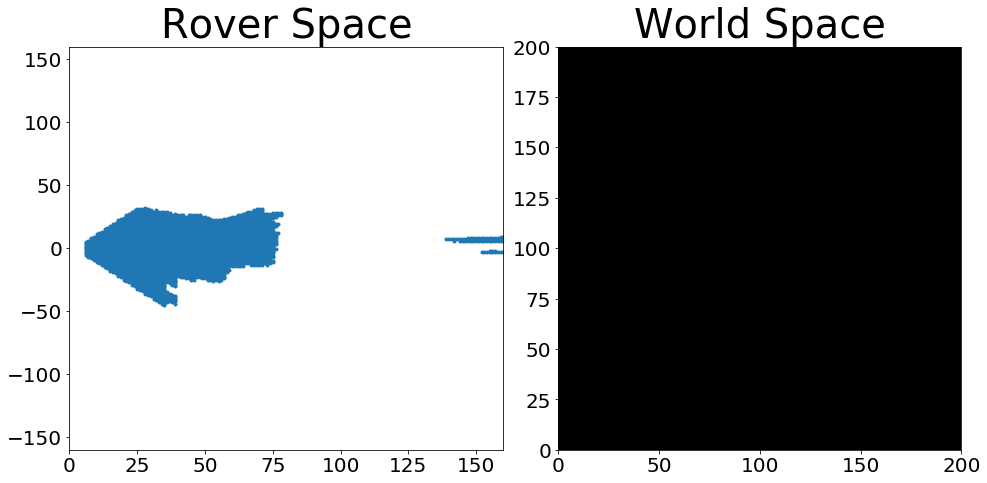

In [42]:
image = mpimg.imread('mapping.jpg')

# Rover yaw values will come as floats from 0 to 360
# Generate a random value in this range
# Note: you need to convert this to radians
    # before adding to pixel_angles
rover_yaw = np.random.random(1)*360

# Generate a random rover position in world coords
# Position values will range from 20 to 180 to 
# avoid the edges in a 200 x 200 pixel world
rover_xpos = np.random.random(1)*160 + 20
rover_ypos = np.random.random(1)*160 + 20

# Note: Since we've chosen random numbers for yaw and position, 
# multiple run of the code will result in different outputs each time.

# Define a function to apply a rotation to pixel positions
def rotate_pix(xpix, ypix, yaw):
    # TODO:
    # Convert yaw to radians
    # Apply a rotation
    xpix_rotated = 0
    ypix_rotated = 0
    # Return the result  
    return xpix_rotated, ypix_rotated

# Define a function to perform a translation
def translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale): 
    # TODO:
    # Apply a scaling and a translation
    xpix_translated = 0
    ypix_translated = 0
    # Return the result  
    return xpix_translated, ypix_translated

# Define a function to apply rotation and translation (and clipping)
# Once you define the two functions above this function should work
def pix_to_world(xpix, ypix, xpos, ypos, yaw, world_size, scale):
    # Apply rotation
    xpix_rot, ypix_rot = rotate_pix(xpix, ypix, yaw)
    # Apply translation
    xpix_tran, ypix_tran = translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale)
    # Clip to world_size
    x_pix_world = np.clip(np.int_(xpix_tran), 0, world_size - 1)
    y_pix_world = np.clip(np.int_(ypix_tran), 0, world_size - 1)
    # Return the result
    return x_pix_world, y_pix_world

# No need to modify code below here
# Perform warping and color thresholding
##########
# Define calibration box in source (actual) and destination (desired) coordinates
# These source and destination points are defined to warp the image
# to a grid where each 10x10 pixel square represents 1 square meter
dst_size = 5 
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
bottom_offset = 6
source = np.float32([[14, 140], [301 ,140],[200, 96], [118, 96]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])
warped = perspect_transform(image, source, destination)
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160))
# Extract navigable terrain pixels
xpix, ypix = robot_coords(colorsel)
# Generate 200 x 200 pixel worldmap
worldmap = np.zeros((200, 200))
scale = 10
# Get navigable pixel positions in world coords
x_world, y_world = pix_to_world(xpix, ypix, rover_xpos, 
                                rover_ypos, rover_yaw, 
                                worldmap.shape[0], scale)
# Add pixel positions to worldmap
worldmap[y_world, x_world] += 1
print('Xpos =', rover_xpos, 'Ypos =', rover_ypos, 'Yaw =', rover_yaw)
# Plot the map in rover-centric coords

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
f.tight_layout()
ax1.plot(xpix, ypix, '.')
ax1.set_title('Rover Space', fontsize=40)
ax1.set_ylim(-160, 160)
ax1.set_xlim(0, 160)
ax1.tick_params(labelsize=20)

ax2.imshow(worldmap, cmap='gray')
ax2.set_title('World Space', fontsize=40)
ax2.set_ylim(0, 200)
ax2.tick_params(labelsize=20)
ax2.set_xlim(0, 200)


plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.1)
#plt.show() # Uncomment if running on your local machine

### Decision: Where to Go?
* The goal of this project is to perform autonomous navigation and mapping.

#### Steering angle
* Calculated the x and y positions of navigable terrain pixels in rover space and now you'd like to decide which direction to steer the rover.

* Convert your (x, y) pixel positions to polar coordinates, where each pixel position is represented by its distance from the origin and angle counterclockwise from the positive x-direction.

In [43]:
# 2 step process:
# Calculate distance to each pixel
# Calculate angle using arctangent function

import numpy as np

# Define a function to convert from cartesian to polar coordinates
def to_polar_coords(xpix, ypix):
    # Calculate distance to each pixel
    dist = np.sqrt(xpix**2 + ypix**2)
    # Calculate angle using arctangent function
    angles = np.arctan2(ypix, xpix)
    return dist, angles

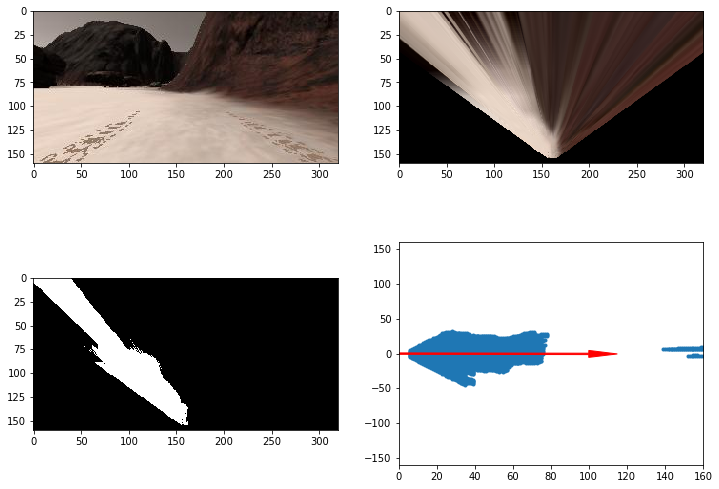

In [44]:
%matplotlib inline

image = mpimg.imread('angle_example.jpg')

source = np.float32([[14, 140], [301 ,140],[200, 96], [118, 96]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])

warped = perspect_transform(image, source, destination) # Perform perspective transform
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160)) # Threshold the warped image
xpix, ypix = robot_coords(colorsel)  # Convert to rover-centric coords
distances, angles = to_polar_coords(xpix, ypix) # Convert to polar coords
avg_angle = np.mean(angles) # Compute the average angle

# Do some plotting
fig = plt.figure(figsize=(12,9))
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(warped)
plt.subplot(223)
plt.imshow(colorsel, cmap='gray')
plt.subplot(224)
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
arrow_length = 100
x_arrow = arrow_length * np.cos(avg_angle)
y_arrow = arrow_length * np.sin(avg_angle)
plt.arrow(0, 0, x_arrow, y_arrow, color='red', zorder=2, head_width=10, width=2)
plt.show()

In [45]:
avg_angle_degrees = avg_angle * 180/np.pi
steering = np.clip(avg_angle_degrees, -15, 15)

#### Reading random image from the dataset

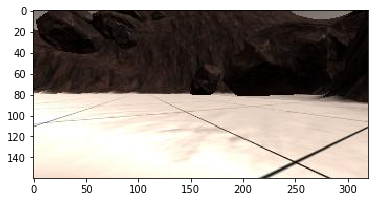

In [46]:
import matplotlib.image as mpimg

path = 'C:/Users/hp/Documents/Robotics/IMG/*'
img_list = glob.glob(path)

# grabing a random image
idx = np.random.randint(0, len(img_list)-1)
image = mpimg.imread(img_list[idx])
plt.imshow(image)

### Read in saved data and ground truth map of the world
The next cell is all setup to read your saved data into a `pandas` dataframe.  Here you'll also read in a "ground truth" map of the world, where white pixels (pixel value = 1) represent navigable terrain.  

After that, we'll define a class to store telemetry data and pathnames to images.  When you instantiate this class (`data = Databucket()`) you'll have a global variable called `data` that you can refer to for telemetry and map data within the `process_image()` function in the following cell. 

In [47]:
# Import pandas and read in csv file as a dataframe
import pandas as pd
# Change the path below to your data directory
# If you are in a locale (e.g., Europe) that uses ',' as the decimal separator
# change the '.' to ','
df = pd.read_csv('C:/Users/hp/Documents/Robotics/robot_log.csv', delimiter=';', decimal='.')
csv_img_list = df["Path"].tolist() # Create list of image pathnames
# Read in ground truth map and create a 3-channel image with it
ground_truth = mpimg.imread('C:/Users/hp/Documents/Robotics/map_bw.png')
ground_truth_3d = np.dstack((ground_truth*0, ground_truth*255, ground_truth*0)).astype(np.float)

# Creating a class to be the data container
# Will read in saved data from csv file and populate this object
# Worldmap is instantiated as 200 x 200 grids corresponding 
# to a 200m x 200m space (same size as the ground truth map: 200 x 200 pixels)
# This encompasses the full range of output position values in x and y from the sim
class Databucket():
    def __init__(self):
        self.images = csv_img_list  
        self.xpos = df["X_Position"].values
        self.ypos = df["Y_Position"].values
        self.yaw = df["Yaw"].values
        self.count = 0 # This will be a running index
        self.worldmap = np.zeros((200, 200, 3)).astype(np.float)
        self.ground_truth = ground_truth_3d # Ground truth worldmap

# Instantiate a Databucket().. this will be a global variable/object
# that you can refer to i

## Write a function to process stored images

Modify the `process_image()` function below by adding in the perception step processes (functions defined above) to perform image analysis and mapping.  The following cell is all set up to use this `process_image()` function in conjunction with the `moviepy` video processing package to create a video from the images you saved taking data in the simulator.  

In short, you will be passing individual images into `process_image()` and building up an image called `output_image` that will be stored as one frame of video.  You can make a mosaic of the various steps of your analysis process and add text as you like (example provided below).  


To start with, you can simply run the next three cells to see what happens, but then go ahead and modify them such that the output video demonstrates your mapping process.  Feel free to get creative!

In [48]:
# Define a function to pass stored images to
# reading rover position and yaw angle from csv file
# This function will be used by moviepy to create an output video
def process_image(img):
    # Example of how to use the Databucket() object defined above
    # to print the current x, y and yaw values 
    # print(data.xpos[data.count], data.ypos[data.count], data.yaw[data.count])

    # TODO: 
    # 1) Define source and destination points for perspective transform
    # 2) Apply perspective transform
    # 3) Apply color threshold to identify navigable terrain/obstacles/rock samples
    # 4) Convert thresholded image pixel values to rover-centric coords
    # 5) Convert rover-centric pixel values to world coords
    # 6) Update worldmap (to be displayed on right side of screen)
        # Example: data.worldmap[obstacle_y_world, obstacle_x_world, 0] += 1
        #          data.worldmap[rock_y_world, rock_x_world, 1] += 1
        #          data.worldmap[navigable_y_world, navigable_x_world, 2] += 1

    # 7) Make a mosaic image, below is some example code
        # First create a blank image (can be whatever shape you like)
    output_image = np.zeros((img.shape[0] + data.worldmap.shape[0], img.shape[1]*2, 3))
        # Next you can populate regions of the image with various output
        # Here I'm putting the original image in the upper left hand corner
    output_image[0:img.shape[0], 0:img.shape[1]] = img

        # Let's create more images to add to the mosaic, first a warped image
    warped = perspect_transform(img, source, destination)
        # Add the warped image in the upper right hand corner
    output_image[0:img.shape[0], img.shape[1]:] = warped

        # Overlay worldmap with ground truth map
    map_add = cv2.addWeighted(data.worldmap, 1, data.ground_truth, 0.5, 0)
        # Flip map overlay so y-axis points upward and add to output_image 
    output_image[img.shape[0]:, 0:data.worldmap.shape[1]] = np.flipud(map_add)


        # Then putting some text over the image
    cv2.putText(output_image,"Populate this image with your analyses to make a video!", (20, 20), 
                cv2.FONT_HERSHEY_COMPLEX, 0.4, (255, 255, 255), 1)
    if data.count < len(data.images) - 1:
        data.count += 1 # Keep track of the index in the Databucket()
    
    return output_image

#### Make a video from processed image data
Use the [moviepy](https://zulko.github.io/moviepy/) library to process images and create a video.
  

In [50]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from moviepy.editor import ImageSequenceClip


# Define pathname to save the output video
output = 'C:/Users/hp/Documents/Robotics/mapping.mp4'
data = Databucket() # Re-initialize data in case you're running this cell multiple times
clip = ImageSequenceClip(data.images, fps=60) # Note: output video will be sped up because 
                                          # recording rate in simulator is fps=25
new_clip = clip.fl_image(process_image) #NOTE: this function expects color images!!
%time new_clip.write_videofile(output, audio=False)

AttributeError: module 'importlib._bootstrap' has no attribute 'SourceFileLoader'

### This next cell should function as an inline video player
If this fails to render the video, try running the following cell (alternative video rendering method).  You can also simply have a look at the saved mp4 in your `/output` folder

In [53]:
import io
import base64
video = io.open(output, 'r+b').read()
encoded_video = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded_video.decode('ascii')))

NameError: name 'output' is not defined